In [2]:
# naimportovanie knižnice pandas ako akronym pd   
# pandas -> používa sa hlavne na analýzu dát, umožňuje importovať dáta z rôznych formátov ako napr. csv, excel, JSON, SQL, ...
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# uloženie datasetu do premennej dataset, s príznakom sep=";" (dáta sú oddelené znakom ;)
dataset = pd.read_csv('cardiovascular_diseases_dv3.csv',sep=";")

In [4]:
dataset

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1


In [5]:
dataset.duplicated().sum()

3820

In [6]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [7]:
dataset.describe()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
count,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000
mean,53.353155,1.356511,164.347259,74.497252,126.979989,81.480766,1.384080,1.237905,0.092714,0.056663,0.797115,0.508797
std,6.811546,0.478972,8.330184,14.552793,17.116092,9.904148,0.691197,0.584059,0.290034,0.231199,0.402150,0.499926
min,30.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,82.500000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


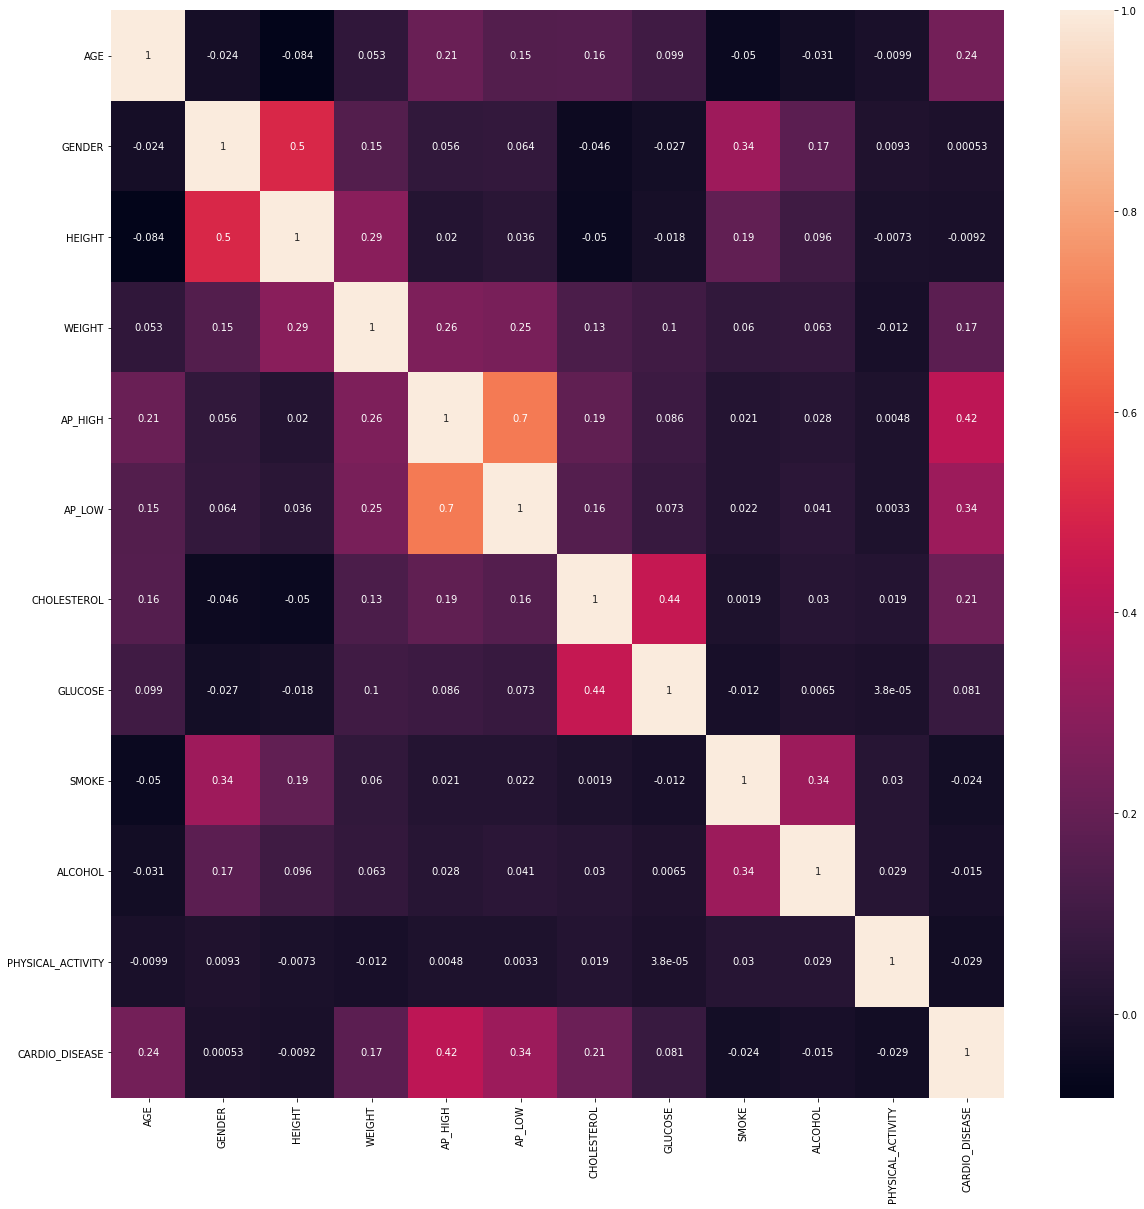

In [8]:
corrMatrix = dataset.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True) #linewidths=0, vmin=-1, cmap="RdBu_r"
plt.show()